# Installing packages if missed

In [ ]:
install.packages("dismo")#installing dismo package
install.packages("readr")#installing readr package to read csv files
install.packages("maptools")#installing maptools
install.packages("dplyr")
install.packages("ggplot2")
install.packages("ggmap")
install.packages("sf", dependencies = TRUE)
install.packages("rnaturalearthdata", dependencies = TRUE)


# Loading our data

For this tutorial we are going to use a set of data on species presence for Miscanthus spp. that I downloaded from Global Biodiversity Information Facility (GBIF)

In [23]:
library(readr)
miscanthus <- read_csv("./miscanthus distribution.csv")#import the data from the file downloaded from https://www.gbif.org/
head(miscanthus)

Parsed with column specification:
cols(
  .default = col_character(),
  gbifID = col_double(),
  individualCount = col_double(),
  decimalLatitude = col_double(),
  decimalLongitude = col_double(),
  coordinateUncertaintyInMeters = col_double(),
  coordinatePrecision = col_logical(),
  elevation = col_double(),
  elevationAccuracy = col_double(),
  depth = col_logical(),
  depthAccuracy = col_logical(),
  eventDate = col_datetime(format = ""),
  day = col_double(),
  month = col_double(),
  year = col_double(),
  taxonKey = col_double(),
  speciesKey = col_double(),
  dateIdentified = col_datetime(format = ""),
  lastInterpreted = col_datetime(format = "")
)
See spec(...) for full column specifications.
Warning message:
"3 parsing failures.
 row                 col           expected  actual                            file
2482 coordinatePrecision 1/0/T/F/TRUE/FALSE 0.01    './miscanthus distribution.csv'
2489 coordinatePrecision 1/0/T/F/TRUE/FALSE 0.0018  './miscanthus distribution.cs

gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
2447991246,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/35095004,Plantae,Tracheophyta,Liliopsida,Poales,Poaceae,Miscanthus,Miscanthus sinensis,...,NA,2019-10-30 18:28:30,CC_BY_NC_4_0,jzeiger05,jzeiger05,NA,NA,2019-11-08 01:24:32,STILLIMAGE,GEODETIC_DATUM_ASSUMED_WGS84;COORDINATE_ROUNDED
2447970135,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/35009887,Plantae,Tracheophyta,Liliopsida,Poales,Poaceae,Miscanthus,Miscanthus sinensis,...,NA,2019-10-28 15:18:30,CC_BY_NC_4_0,jzeiger05,jzeiger05,NA,NA,2019-11-08 01:24:19,STILLIMAGE,GEODETIC_DATUM_ASSUMED_WGS84;COORDINATE_ROUNDED
2447945342,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/34926992,Plantae,Tracheophyta,Liliopsida,Poales,Poaceae,Miscanthus,Miscanthus sinensis,...,NA,2019-10-27 14:42:49,CC_BY_NC_4_0,sarahs0922,sarahs0922,NA,NA,2019-11-08 01:23:55,STILLIMAGE,GEODETIC_DATUM_ASSUMED_WGS84;COORDINATE_ROUNDED
2447928237,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/34856383,Plantae,Tracheophyta,Liliopsida,Poales,Poaceae,Miscanthus,Miscanthus sinensis,...,NA,2019-10-25 02:05:59,CC_BY_NC_4_0,cschorn,cschorn,NA,NA,2019-11-08 01:23:37,STILLIMAGE,GEODETIC_DATUM_ASSUMED_WGS84;COORDINATE_ROUNDED
2447845501,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/34302618,Plantae,Tracheophyta,Liliopsida,Poales,Poaceae,Miscanthus,Miscanthus sinensis,...,NA,2019-10-13 14:21:15,CC_BY_NC_4_0,gutschow,gutschow,NA,NA,2019-11-08 01:22:42,STILLIMAGE,GEODETIC_DATUM_ASSUMED_WGS84;COORDINATE_ROUNDED
2447818664,7f5e4129-0717-428e-876a-464fbd5d9a47,Natuurpunt:Waarnemingen:180269910,Plantae,Tracheophyta,Liliopsida,Poales,Poaceae,Miscanthus,Miscanthus sacchariflorus,...,NA,NA,CC_BY_NC_4_0,Natuurpunt Studie,NA,NA,NA,2019-11-07 13:42:26,NA,NA


# Distribution map using maptools
## Plotting a background tile 
To create our distribution map with maptools, firstly we have to create a background map

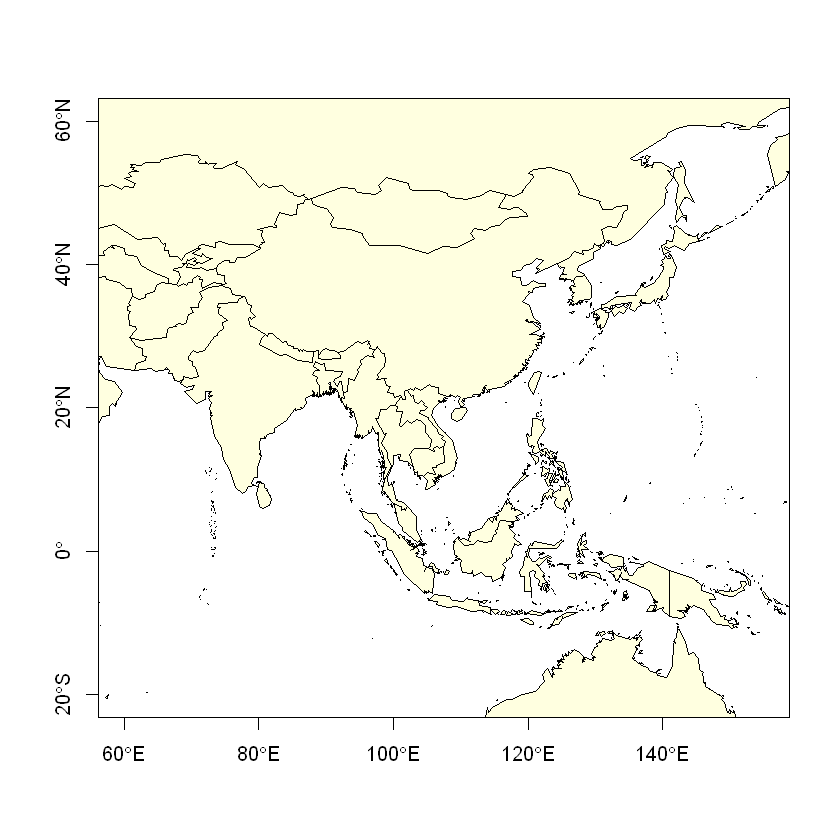

In [24]:
library(maptools)
data(wrld_simpl)
plot(wrld_simpl, xlim=c(60,155), ylim=c(-20,60), axes=TRUE, col="light yellow")
# restore the box around the map
box()

## Plotting our presence points
Then we plot our coordinates points on the map

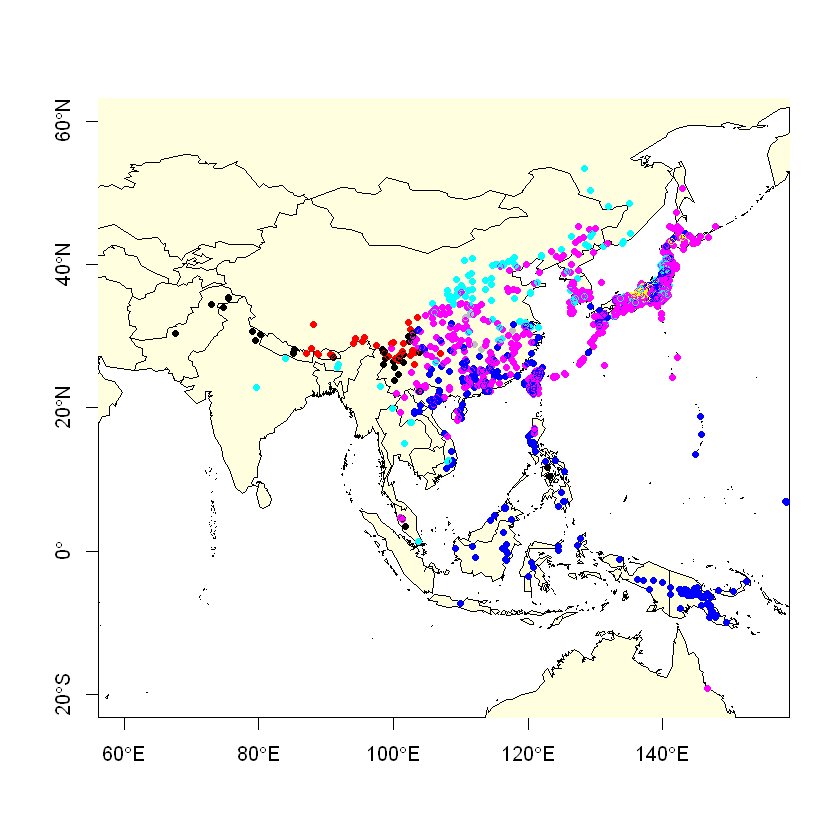

In [25]:
# add the points
plot(wrld_simpl, xlim=c(60,155), ylim=c(-20,60), axes=TRUE, col="light yellow")
points(miscanthus$decimalLongitude, miscanthus$decimalLatitude, col=as.factor(miscanthus$species), pch=20, cex=0.75)
# plot points again to add a border, for better visibility 
points(miscanthus$decimalLongitude, miscanthus$decimalLatitude, col=as.factor(miscanthus$species), cex=0.75)


# The same map can be done with sf package
The sp and sf packages use different methodologies for integrating spatial data into R. The sp package introduced a coherent set of classes and methods for handling spatial data in 2005. The package remains the backbone of many packages that provide GIS capabilities in R. The sf package implements the simple features open standard for the representation of geographic vector data in R. The package first appeared on CRAN at the end of 2016 and is under very active development. The sf package is meant to supersede sp, implementing ways to store spatial data in R that integrate with the tidyverse workflow of the packages developed by Hadley Wickham and others.

In [26]:
library(sf)
library(rnaturalearth)
library(rnaturalearthdata)
# Create data frame of only longitude and latitude values
coords <- select(miscanthus_dens, decimalLongitude, decimalLatitude)

# Create SpatialPoints object with coords and CRS
points_sf <- st_as_sf(miscanthus_dens, coords = c("decimalLongitude", "decimalLatitude"), crs = 4326)

coast_sf <- ne_coastline(scale = "medium", returnclass = "sf")
countries_sf <- ne_countries(scale = "medium", returnclass = "sf")



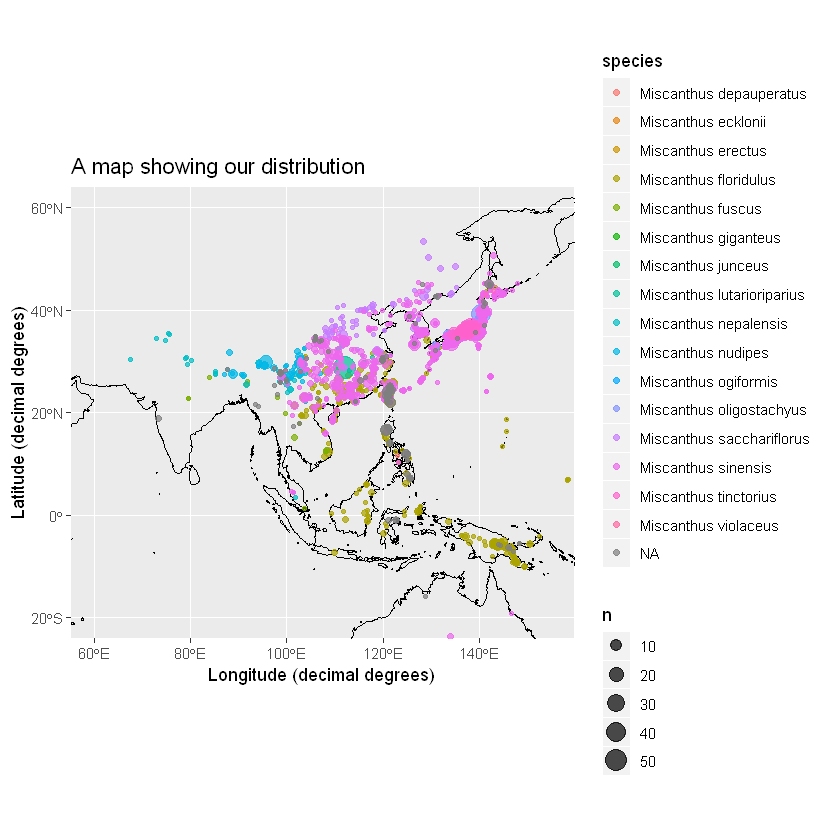

In [27]:
ggplot()+
  geom_sf(data = coast_sf) + 
  geom_sf(data = points_sf,
          aes(color = species, size = n),
          alpha = 0.7,
          show.legend = "point") +
    labs(title= "A map showing our distribution")+
    xlab("Longitude (decimal degrees)")+
    ylab("Latitude (decimal degrees)")+
  coord_sf(xlim=c(60,155), ylim=c(-20,60))

# Mapping using ggmap
ggmap is essentially an extension of ggplot. It enables you to plot a map as the background of a ggplot graph. The two main plotting features of ggmap are the get_map() function, which downloads a map from a specified map provider, and the ggmap() function that plots the downloaded map on a ggplot plot. 

## Creating a dataframe with abundance of species
Firstly we create a dataframe where we count how many observations of each species at each coordinate point

In [28]:
library(dplyr)
miscanthus_dens<-miscanthus%>%
  count(species, decimalLatitude, decimalLongitude)
head(miscanthus_dens)

species,decimalLatitude,decimalLongitude,n
Miscanthus depauperatus,10.41100,123.1320,1
Miscanthus depauperatus,10.41159,123.1330,1
Miscanthus depauperatus,11.74194,122.8786,1
Miscanthus ecklonii,-34.12500,24.8750,1
Miscanthus ecklonii,-33.87500,18.3750,1
Miscanthus ecklonii,-33.87500,18.8750,1


## Creating a map with ggmap
Then we use this dataframe to create a map where we visualise how our species is distributed. 
Using stat_density_2d() it is possible to create a sort of "area of distribution for each species/genetic group. More layers of information can be added.

Warning message:
"Removed 2241 rows containing missing values (geom_point)."

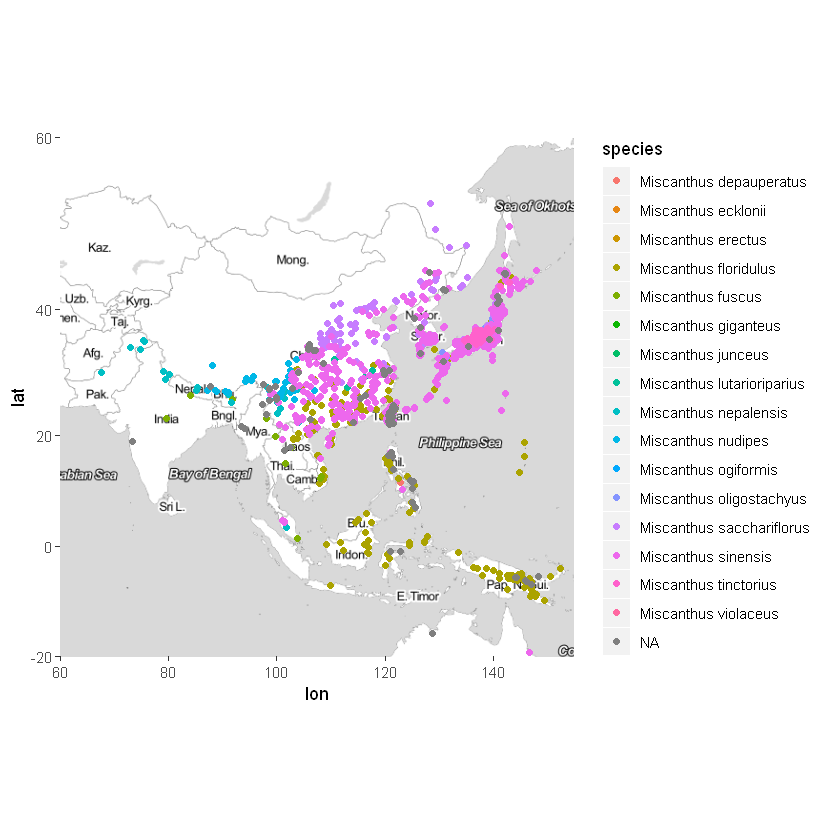

In [33]:
library("ggmap")
map <- c(left = 60, bottom = -20, right = 155, top = 60)
map1<-get_stamenmap(map, zoom = 3, maptype = "toner-lite")
ggmap(map1)+
    geom_point(data = miscanthus_dens, 
               mapping = aes(x = decimalLongitude, 
                             y = decimalLatitude,
                            colour = species))#+
    #stat_density_2d(data = miscanthus_dens,aes(x = decimalLongitude,
                                               #y = decimalLatitude, 
                                               #fill = species), 
                    #geom = "polygon", 
                    #alpha = .3, 
                    #color = NA)

Warning message:
"Removed 2241 rows containing non-finite values (stat_density2d)."

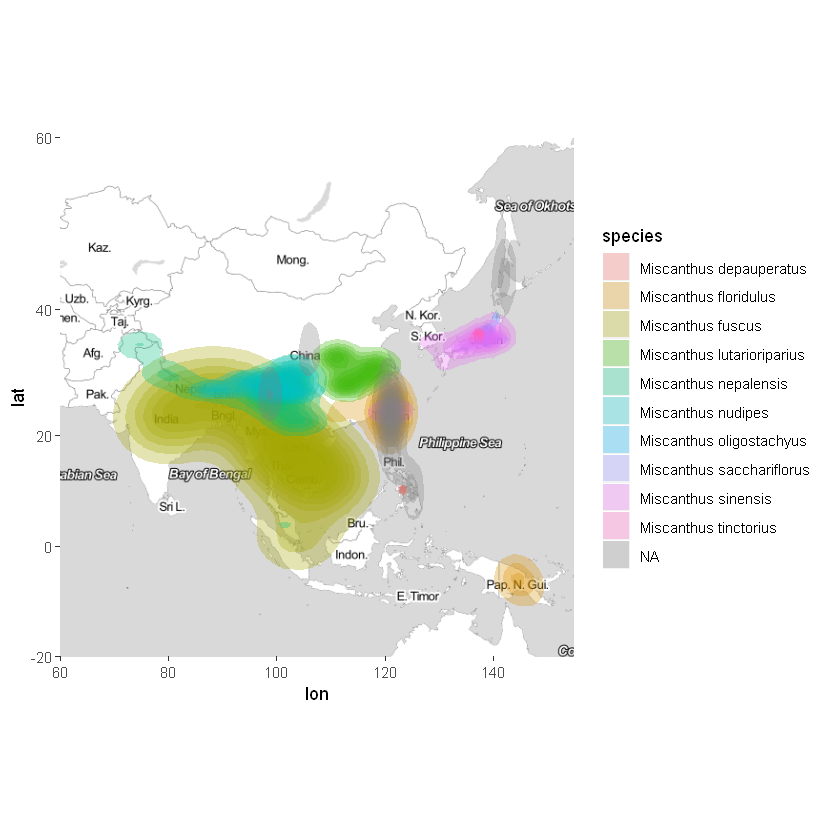

In [34]:
ggmap(map1)+
    stat_density_2d(data = miscanthus_dens,aes(x = decimalLongitude,
                                               y = decimalLatitude, 
                                               fill = species), 
                    geom = "polygon", 
                    alpha = .3, 
                    color = NA)